In [42]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mode
from math import pi

The following list is the characterization of each observed drop. The first value represents the fall time in seconds for the drop to fall 2 mm, the second is the size in mm the drop was on the screen, and the third is the voltage required to suspend the drop in the air.

In [26]:
drops = [[13.3, 1, 21],
         [32.2, 1, 40],
         [63.2, 0.9, 10],
         [76.7, 1, 17],
         [35.5, 1.1, 9],
         [112.1, 0.7, 7],
         [113.7, 0.7, 7],
         [10.2, 1.1, 30],
         [41.3, 1.5, 53], 
         [4.7, 1.2, 134],
         [9.7, 1, 263],
         [9.8, 1, 44.5],
         [74.7, 1, 105],
         [22.7, 1.1, 18],
         [8.4, 1.1, 194],
         [60, 0.9, 9],
         [51.4, 1, 45] ]

In [27]:
times    = [i[0] for i in drops]
voltages = [i[2] for i in drops]

Parameters and constants

In [28]:
wire_radius = 0.266             # mm
wr_error    = 0.002             # mm
calibration = [15, 15, 16]      # mm
calibration_uncertainty = 0.5   # mm

g    = 9.8                         # ms^-2
b    = 6.17e-6                     # m(cmHg)
I    = 2                           # mm 
p    = 75.9999951996077            # cmHg
eta1 = 1.846e-5                    # kg/m s
eta2 = 1.568e-5                    # kg/m s

magnification = np.mean(calibration)/wire_radius
print(magnification)

v0 = 2                          # v

rho_oil = 981                   # kgm^-3
ro_err  = 5                     # kgm^-3

57.64411027568922


In [29]:
velocities = [2/(i[0] * 1000) for i in drops] # m/s

radii = [np.sqrt((9 * eta1 * i)/ (2 * rho_oil * g)) for i in velocities] # m

print('\n'.join(str(i) for i in radii))

1.1398920927704012e-06
7.325910787722725e-07
5.229149066729674e-07
4.7467010400972755e-07
6.97710702710677e-07
3.9263296100797247e-07
3.89860584151644e-07
1.3016357723744941e-06
6.468663142221972e-07
1.9175232238619385e-06
1.3347615708948067e-06
1.3279341012062205e-06
4.809824836854681e-07
8.725224957284358e-07
1.434332762415136e-06
5.366781775582466e-07
5.798397735218486e-07


In [30]:
eta_prime = [eta1/(1 + b/(p * i)) for i in radii]


In [35]:
constant = 18 * np.pi / np.sqrt(2 * rho_oil * g)
charges  = [constant * ((eta1*2e-4)/(times[i]*(1 + (b/p*radii[i])))**(3/2)) * (5e-4/voltages[i]) for i in range(len(drops))]
for i in charges:
    print(i)

7.390856649498143e-16
1.0300249301336877e-16
1.4983591272478498e-16
6.592491337685771e-17
3.954635823058759e-16
9.061186644777483e-17
8.870595954375139e-17
7.703179585467844e-16
5.351685555511792e-17
5.51365959420469e-16
9.474977454123277e-17
5.514325658807032e-16
1.1105070840991557e-17
3.867054067414752e-16
1.5939359873548842e-16
1.7997913080926842e-16
4.539775145634564e-17


In [90]:
diffs = []
for i in charges:
    for j in charges:
        diffs.append(abs(i - j))
        
for i in diffs:
    if i ==0:
        diffs.remove(i)
    

short_diffs = ["%2.5e" % i for i in diffs]

In [91]:
b = np.arange(8e-20, 2e-18, 1e-20)

(array([26., 24., 22., 16., 14.,  6.,  6., 10.,  4.,  4., 10.,  2.,  0.,
        12.,  6., 10.,  4., 12.,  8.,  0.,  4., 12.,  8.,  4.,  4.,  2.,
         2.,  4.,  4.,  8.,  2., 12.,  2.,  6.,  2.]),
 array([6.66065000e-20, 2.17565035e-17, 4.34464004e-17, 6.51362974e-17,
        8.68261943e-17, 1.08516091e-16, 1.30205988e-16, 1.51895885e-16,
        1.73585782e-16, 1.95275679e-16, 2.16965576e-16, 2.38655473e-16,
        2.60345370e-16, 2.82035267e-16, 3.03725164e-16, 3.25415061e-16,
        3.47104958e-16, 3.68794855e-16, 3.90484752e-16, 4.12174649e-16,
        4.33864546e-16, 4.55554443e-16, 4.77244340e-16, 4.98934237e-16,
        5.20624133e-16, 5.42314030e-16, 5.64003927e-16, 5.85693824e-16,
        6.07383721e-16, 6.29073618e-16, 6.50763515e-16, 6.72453412e-16,
        6.94143309e-16, 7.15833206e-16, 7.37523103e-16, 7.59213000e-16]),
 <a list of 35 Patch objects>)

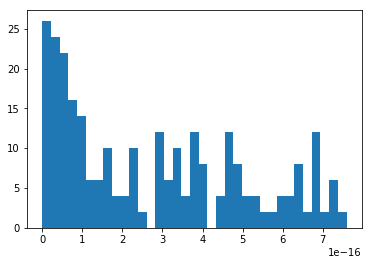

In [92]:
short_diffs = [float(i) for i in short_diffs];

plt.hist(short_diffs, 35)

In [94]:

mode(short_diffs)


ModeResult(mode=array([6.66065e-20]), count=array([2]))

(array([4., 6., 1., 0., 1., 1., 0., 2., 0., 2.]),
 array([1.11050708e-17, 8.70263596e-17, 1.62947648e-16, 2.38868937e-16,
        3.14790226e-16, 3.90711515e-16, 4.66632803e-16, 5.42554092e-16,
        6.18475381e-16, 6.94396670e-16, 7.70317959e-16]),
 <a list of 10 Patch objects>)

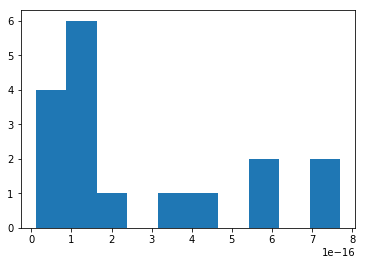

In [100]:
plt.hist(charges,10)